> # Лабораторная работа №1. Вариант 7 "Camera"
 ### *Выполнил студент 18-ИВТ-2 Жаркова Ольга*

> ## Начало работы. Подключаем нужные библиотеки.

In [230]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import(absolute_import, division, print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
# будем отображать графики прямо в jupyter'e
%pylab inline
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as dp
import seaborn as sns
%matplotlib inline
camera = dp.read_csv('camera.csv')

Populating the interactive namespace from numpy and matplotlib


> ## 1.Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.

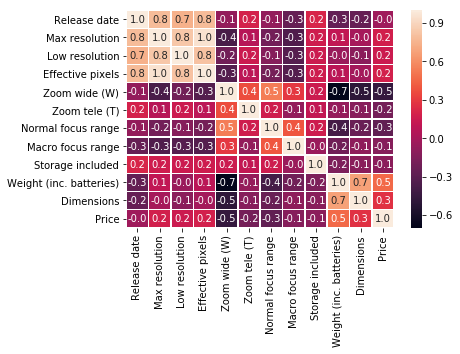

In [8]:
sns.heatmap(camera.corr(), annot = True, fmt = '.1f', linewidths = .5)

 **Вывод:** максимальное значение корреации между признаком *'Release date'* с параметрами *'Release date', 'Max resolution', 'Low resolution'*; признаком *'Weight (inc. batteries)'* с параметром * 'Dimensions'*, и минимальное значение корреляции между признаком *'Zoom wide (W)'* с параметрами *'Weight (inc. batteries)', 'Dimensions', 'Price'*

> ## 2. Вычислите корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.


Коэффициент корреляции Пирсона:  (0.12911915630486501, 3.0137254410640978e-05)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=0.10126852664923244, pvalue=0.0010863948570554284)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
p-value is good


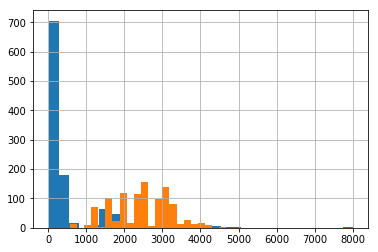

In [184]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

laber_encoder = LabelEncoder()
vehicleCoder = dp.Series(laber_encoder.fit_transform(camera['Max resolution']))
pears = pearsonr(camera['Price'], vehicleCoder)
spearm = spearmanr(camera['Price'], vehicleCoder)

print("Коэффициент корреляции Пирсона: ", pears)
print("Коэффициент корреляции Спирмена: ", spearm)

print(camera.Price.hist(bins = 30))  
print(camera['Max resolution'].hist(bins = 30))

if (spearm[1]<0.05):
    print("p-value is good")
else:
    print("p-value is not good")

> ## 3. Постройте график изменения средней цены на камеры по годам.

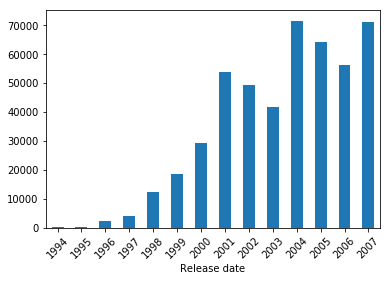

In [160]:
camera.groupby(['Release date'])['Price'].sum().plot(kind = 'bar',rot=45)

> ## 4. Определите компанию, камеры которой наиболее часто встречаются в наборе данных.

In [161]:
model = camera['Model'].max()
print(model)

Toshiba PDR-T10


> ## 5. Добавьте в набор данных признак, являющийся произведением двух других признаков.

In [162]:
camera['Max resolution*Low resolution'] = [n for n in (camera['Low resolution'] * camera['Max resolution'] )]
camera[['Low resolution', 'Max resolution', 'Max resolution*Low resolution']].head(15)

,Low resolution,Max resolution,Max resolution*Low resolution
0,640.0,1024.0,655360.0
1,640.0,1280.0,819200.0
2,0.0,640.0,0.0
3,640.0,1152.0,737280.0
4,640.0,1152.0,737280.0
5,640.0,1600.0,1024000.0
6,640.0,1280.0,819200.0
7,0.0,640.0,0.0
8,640.0,832.0,532480.0
9,1024.0,1280.0,1310720.0


> ## 6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.

In [234]:
camera_duplicat = camera
camera_duplicat = camera_duplicat.dropna()

print('camera:------------------------', camera.shape, '----------------')
print(camera.info())
print('camera_duplicat:---------------', camera_duplicat.shape, '----------------')
print(camera_duplicat.info())

camera:------------------------ (1038, 13) ----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
Model                      1038 non-null object
Release date               1038 non-null int64
Max resolution             1038 non-null float64
Low resolution             1038 non-null float64
Effective pixels           1038 non-null float64
Zoom wide (W)              1038 non-null float64
Zoom tele (T)              1038 non-null float64
Normal focus range         1038 non-null float64
Macro focus range          1037 non-null float64
Storage included           1036 non-null float64
Weight (inc. batteries)    1036 non-null float64
Dimensions                 1036 non-null float64
Price                      1038 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB
None
camera_duplicat:--------------- (1036, 13) ----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 

> ## 7. Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью.

In [163]:
min_price = camera['Price'].min()
max_price = camera['Price'].max()
print('min_price: ', min_price)
print('max_price: ', max_price)


min_price:  14.0
max_price:  7999.0


> ## 8. Определите год, в который было выпущено максимально количество новых камер.

In [226]:
year = camera.groupby('Release date')['Model'].count()
print(year)
mop = (year.max())
print('the max number of cameras is', mop)
model = camera['Release date'].max()
print('the max number of cameras was released in a', model)

Release date
1994      1
1995      1
1996      4
1997     11
1998     32
1999     53
2000     61
2001     85
2002     89
2003    101
2004    141
2005    143
2006    153
2007    163
Name: Model, dtype: int64
the max number of cameras is 163
the max number of cameras was released in a 2007


> ## Конец работы!